In [1]:
import pandas as pd
from ml_toolkit.data_handler import DataHandler
from ml_toolkit.feature_engineer import FeatureEngineer
from ml_toolkit.model_executor import ModelExecutor
from ml_toolkit.visualizer import Visualizer
from ml_toolkit.model_forecaster import ModelForecaster


2025-06-14 16:00:11.328386: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


Loading raw data from pickle file: '../fin_data/GBP_USD_H4.pkl'...
Filtering data from 2020-01-01 to 2024-07-29.
Data successfully loaded and filtered. Resulting shape: (7130, 6)
Time range in cleaned data: 2020-01-01 22:00:00 to 2024-07-29 21:00:00


Epoch 1/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 12s 21ms/step - accuracy: 0.5110 - loss: 1.0154 - val_accuracy: 0.8311 - val_loss: 0.5970
Epoch 2/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.7536 - loss: 0.6864 - val_accuracy: 0.7822 - val_loss: 0.6038
Epoch 3/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7531 - loss: 0.6592 - val_accuracy: 0.8756 - val_loss: 0.5086
Epoch 4/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7608 - loss: 0.6613 - val_accuracy: 0.8978 - val_loss: 0.4296
Epoch 5/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - accuracy: 0.7762 - loss: 0.6217 - val_accuracy: 0.9407 - val_loss: 0.3714
Epoch 6/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7911 - loss: 0.6251 - val_accuracy: 0.9348 - val_loss: 0.3633
Epoch 7/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.7999 - loss: 0.6003 - val_accuracy: 0.8726 - val_loss: 0.4890
Epoch 8/10
95/95 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7839 - loss: 0.5947 - val_accuracy: 0.8800 - 

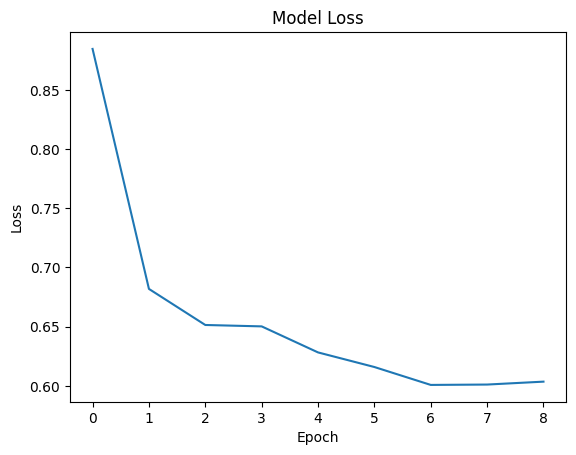

23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 46ms/step


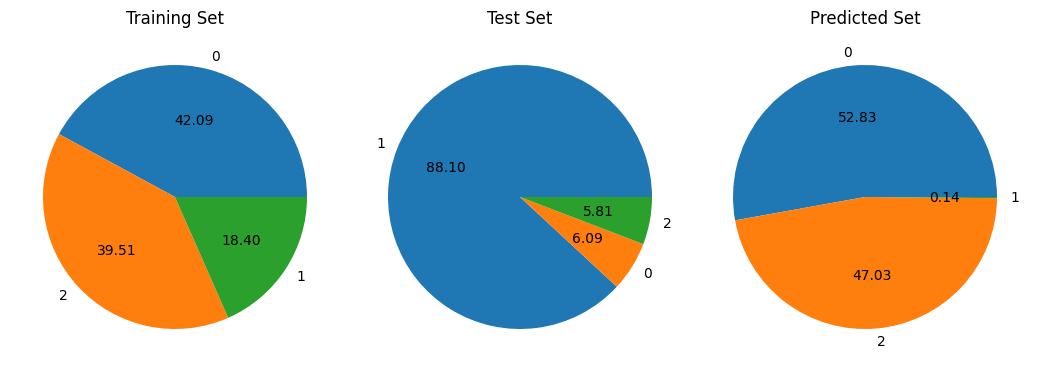

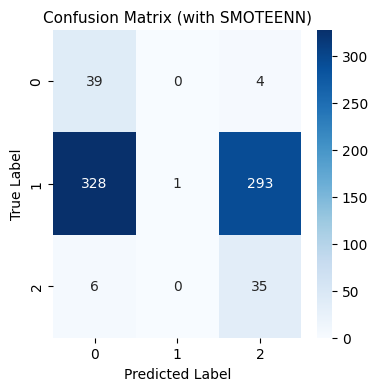

              precision    recall  f1-score   support

        Sell       0.10      0.91      0.19        43
     Neutral       1.00      0.00      0.00       622
         Buy       0.11      0.85      0.19        41

    accuracy                           0.11       706
   macro avg       0.40      0.59      0.13       706
weighted avg       0.89      0.11      0.03       706



Balanced training label distribution: Counter({0: 2839, 2: 2665, 1: 1241})
Minimum label in y_train: 0
Unique classes in y_train: [0 1 2]


Minimum label in y_test: 0
Test label distribution: Counter({1: 622, 0: 43, 2: 41})
Unique classes in y_test: [0 1 2]
Unique classes in y_pred_classes: [0 1 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.6793826  0.29998404 0.02063335]
 [0.7260591  0.25807688 0.01586411]
 [0.74084616 0.24465303 0.01450095]
 [0.7521172  0.23443076 0.01345202]
 [0.78616    0.20315605 0.01068386]]
Sample y_pred_classes: [0 0 0 0 0]


Initial class weights: {0: 0.8484031665900601, 1: 0.04629182598444265, 2: 1.0}
Optimized Weights: {0: 0.8484031665900601, 1: 0.100000001, 2: 1.0}
Best accuracy score: 0.10623229461756374


In [2]:
model, mse, df, y_test_imputed, y_pred_imputed, test_indices, label_encoder, optimized_class_weights, scaler_X  = ModelExecutor.execute_model(
                  file_path='../fin_data/GBP_USD_H4.pkl', 
                  start_date="2020-1-1", end_date="2024-07-29 21:00", test_size=0.1,
                  features = ['RSI', 'MACD', 'Volume'],
                  imbalance = True, imb_type = 'smote_enn',
                  model_type='Conv1D+GRU', model_style='Functional',
                  model_layers=5, units=64, dropout_rate=0.2,
                  learning_rate = 0.001, epochs=10, batch_size=32*2,
                  plot_type=None,forecast_period_min=60)

# AVAILABLE OPTIONS ------------------------------------------------------------------------------------------------
# features: ['Close', 'Volume', 'RSI', 'MACD']
# imb_type: 'smote', 'adasyn', 'random_oversampler', 'random_undersampler', 'tomek_links', 'nearmiss', 'smote_tomek', 'smote_enn'
# Model style: 'Sequential', 'Functional'
# Model type: 'LSTM', 'GRU', 'Conv1D', 'Transformer', 'Attention', or combinations like 'LSTM+Conv1D+Attention'. 'LSTM+GRU'
# Plot type: 'test', 'train', 'test+train', 'forecast'
# DEAFULTS: model_layers=3, units=50, dropout_rate=0.2, learning_rate=0.001, epochs=10, batch_size=32*1
# You may want to under-train the model, e.g. epochs=3, batch_size=32 ------------------------------------------------

219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


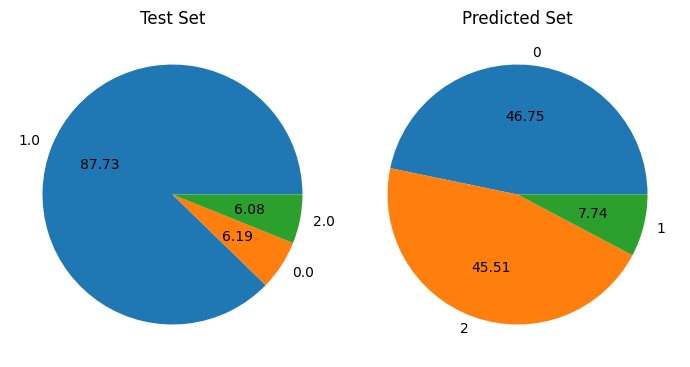

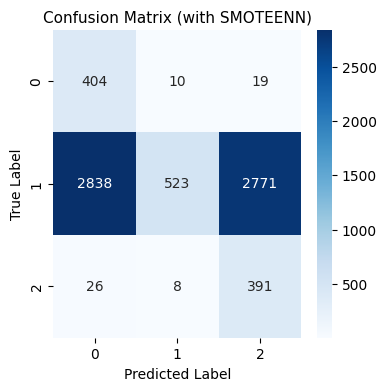

              precision    recall  f1-score   support

        Sell       0.12      0.93      0.22       433
     Neutral       0.97      0.09      0.16      6132
         Buy       0.12      0.92      0.22       425

    accuracy                           0.19      6990
   macro avg       0.40      0.65      0.20      6990
weighted avg       0.86      0.19      0.16      6990



Minimum label in y_test: 0.0
Test label distribution: Counter({1.0: 6132, 0.0: 433, 2.0: 425})
Unique classes in y_test: [0. 1. 2.]
Unique classes in y_pred_classes: [0 1 2]
Classes in LabelEncoder: [0. 1. 2.]


Sample y_pred_proba: [[0.75265443 0.23311713 0.01422837]
 [0.65421706 0.3228374  0.02294549]
 [0.6282504  0.34689957 0.02484998]
 [0.5974054  0.37715688 0.02543771]
 [0.6526901  0.3256653  0.02164452]]
Sample y_pred_classes: [0 0 0 0 0]


Used class weights: {0: 0.8484031665900601, 1: 5, 2: 1.0}
Initial class weights: {0: 0.9706446439671274, 1: 0.05817753372386521, 2: 1.0}
Optimized Weights: {0: 0.9706446439671274, 1: 0.200000001, 2: 1.0}
Best accuracy score: 0.18855507868383406


In [3]:
# Feature Engineering
df, time, X, y = FeatureEngineer.add_features(df=df, features=['RSI', 'MACD', 'Volume'])

# Scale and predict new data
y_pred_reconstructed, accuracy, precision, recall, f1, confusion, mse, rmse = \
    ModelExecutor.scale_predict_data(model=model, class_weights=optimized_class_weights, scaler_X=scaler_X, 
                       label_encoder=label_encoder, X_test=X, y_test=y, plot=False)

In [4]:
df['y_pred'] = y_pred_reconstructed
fig = Visualizer.plot_with_peaks(df=df, plot_peaks=True, plot_ypred=True, symbol_size=10)

# Set x-axis limits
fig.update_layout(
                xaxis=dict(range=['2024-07-09', '2024-07-29']),
                yaxis=dict(range=[1.27, 1.31])
            )
fig.show()

In [5]:
df['BuySell'] = None
df['TClose'] = None

# Process signals
trade_log, metrics = ModelForecaster.process_signals(df, threshold=1)

# Print results
print("Metrics:", metrics)
trade_log.tail(25)

Metrics: {'Total Profit': 0.039510000000002155, 'Sharpe Ratio (Per Trade)': 0.0065766942313581, 'Total Trades': 848, 'Mean Profit Per Trade': 4.6591981132078015e-05, 'Std Dev Profit Per Trade': 0.00708440737748221}


,Entry Date,Entry Price,Exit Date,Exit Price,Profit,Direction,Exit Reason
823,2024-06-07 05:00:00,1.27886,2024-06-07 09:00:00,1.27378,0.00508,Sell,Opposite Signal
824,2024-06-07 13:00:00,1.27241,2024-06-11 09:00:00,1.27442,0.00201,Buy,Opposite Signal
825,2024-06-12 05:00:00,1.27576,2024-06-13 01:00:00,1.27801,-0.00225,Sell,Neutral Signal
826,2024-06-13 09:00:00,1.27845,2024-06-13 13:00:00,1.27456,0.00389,Sell,Opposite Signal
827,2024-06-13 17:00:00,1.27632,2024-06-17 17:00:00,1.27042,-0.00590,Buy,Neutral Signal
828,2024-06-18 05:00:00,1.26802,2024-06-18 13:00:00,1.27024,0.00222,Buy,Opposite Signal
829,2024-06-18 17:00:00,1.27081,2024-06-18 21:00:00,1.27039,0.00042,Sell,Neutral Signal
830,2024-06-19 05:00:00,1.27326,2024-06-19 21:00:00,1.27156,0.00170,Sell,Neutral Signal
831,2024-06-20 09:00:00,1.26782,2024-06-24 09:00:00,1.26655,-0.00127,Buy,Opposite Signal
832,2024-06-24 13:00:00,1.26796,2024-06-26 05:00:00,1.26658,0.00138,Sell,Opposite Signal


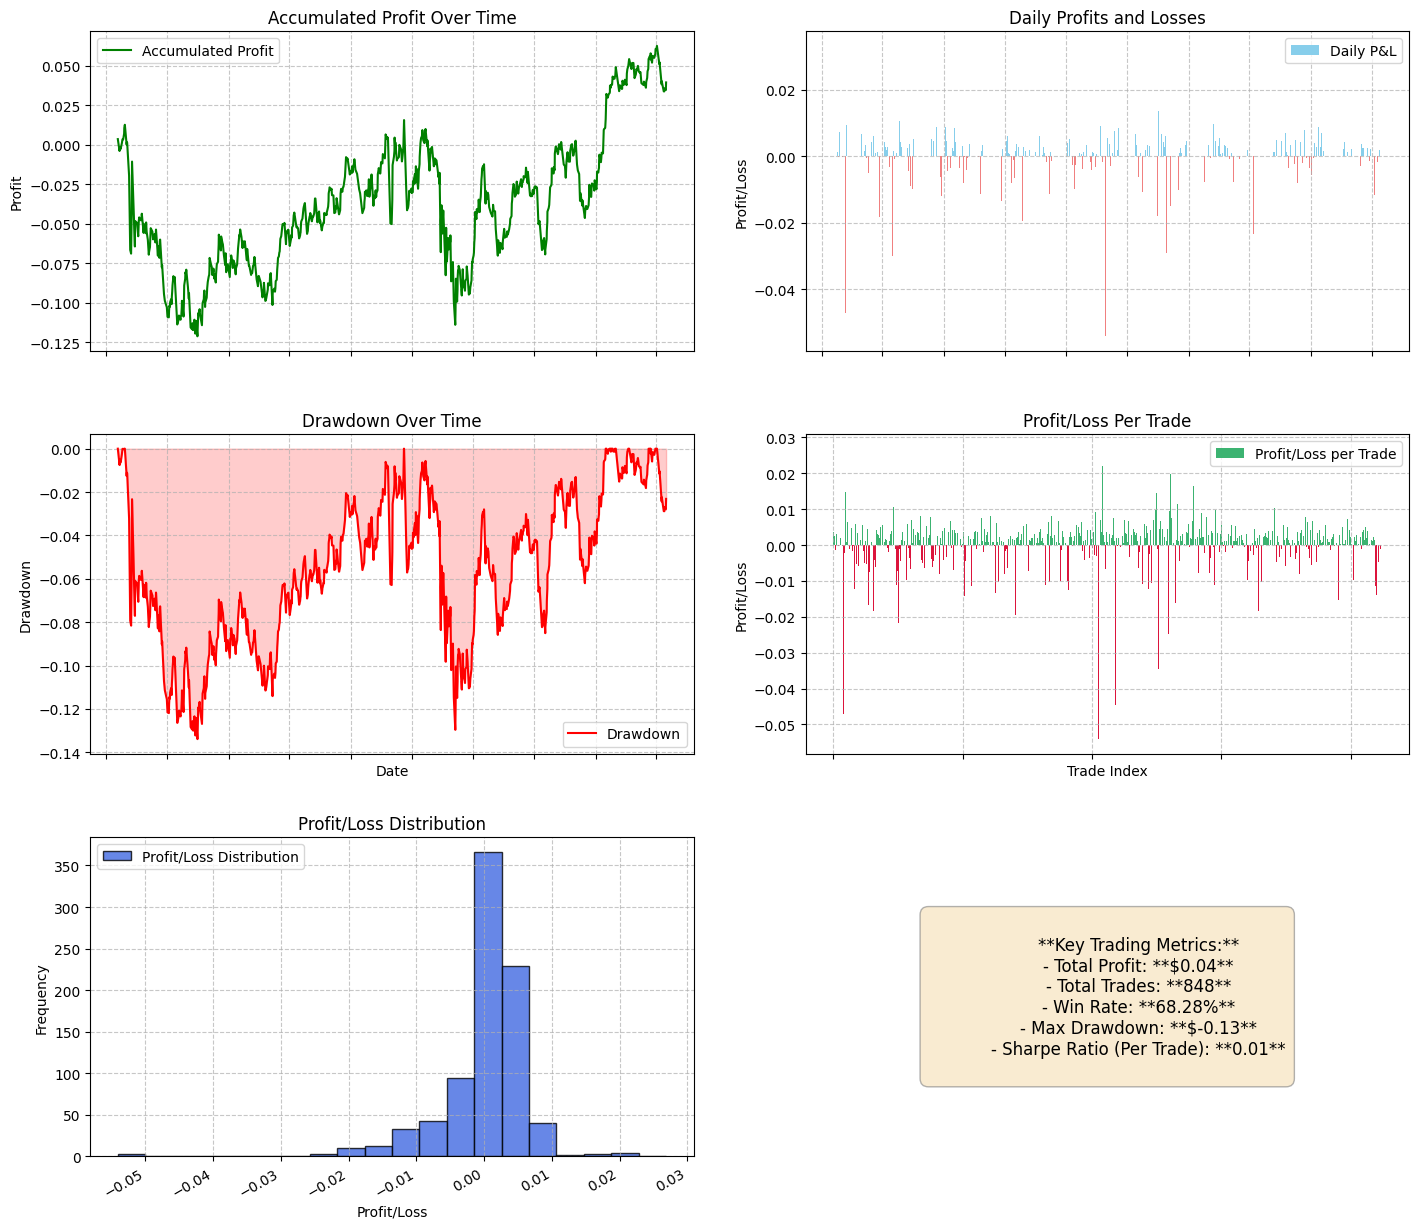

In [7]:
extended_metrics = Visualizer.plot_trades_metrics(trade_log, metrics)